<a href="https://colab.research.google.com/github/Ibra8000/ARABIC-OCR/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
#Feature Selection Methods
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import GenericUnivariateSelect, chi2
#Split data to train and test
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [ ]:

# dataset_digit = pd.read_csv("/content/drive/MyDrive/Final_project/Digit Dataset With Lable.csv")
# print(dataset_digit.head())


X = pd.read_csv("/content/drive/MyDrive/Final_project/Features.csv")
y = pd.read_csv("/content/drive/MyDrive/Final_project/Target.csv")

In [ ]:

# Feature Selection
transformer = GenericUnivariateSelect(chi2, 'k_best', param=784)
X_new = transformer.fit_transform(X, y)

X_new.shape

transformer.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
#Build the model CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.2113 - accuracy: 0.9390
Epoch 2/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0411 - accuracy: 0.9875
Epoch 3/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0174 - accuracy: 0.9946
Epoch 5/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0138 - accuracy: 0.9953
Epoch 6/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0086 - accuracy: 0.9975
Epoch 7/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0095 - accuracy: 0.9968
Epoch 8/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0060 - accuracy: 0.9976
Epoch 9/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0058 - accuracy: 0.9981
Epoch 10/10
1500/1500 [==============================] - 27s 18m

In [ ]:
model.evaluate(X_test, y_test)

375/375 [==============================] - 2s 6ms/step - loss: 0.0330 - accuracy: 0.9923


[0.033018145710229874, 0.9923333525657654]

In [ ]:
import matplotlib.pyplot as plt

7


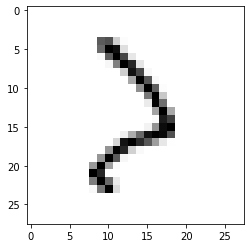

In [77]:
# Load the rotate image library
import scipy
from scipy import ndimage
import numpy as np
from numpy import flipud
image_index = 31

pic = plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')


predict = X_test[image_index].reshape(28,28)

pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))


print(pred.argmax())